In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

class Stats:
    def __init__(self) -> None:
        self.fitness_history = []
        self.network = None
        self.fitness = None

class Params():
    def __init__(self, data, T0, p, alpha, mutation_prob, max_iterations, max_tests) -> None:
        self.data = data
        self.T0 = T0
        self.p = p
        self.alpha = alpha
        self.mutation_prob = mutation_prob
        self.max_iterations = max_iterations
        self.max_tests = max_tests

def comparator(x, y):
    if x > y:
        return y, x
    else:
        return x, y
    
def num_of_comparators(network):
    return sum(map(lambda t: t[-1], network))

def init_network(n):
    network = []
    for i in range(n):
        for j in range(i+1, n):
            network.append((i, j, True))
    return network

def apply_network(network, data):
    sorted_data = data.copy()
    for i, j, used in network:
        if used:
            sorted_data[i], sorted_data[j] = comparator(sorted_data[i], sorted_data[j])
    return sorted_data

def count_errors(network, input):
    ground_truth = np.sort(input)
    sorted_input = apply_network(network, input)
    return sum(1 for i in range(len(input)) if sorted_input[i] != ground_truth[i])

def test_max_n_cases(network, data, n):
    if np.math.factorial(len(data)) > n:
        return np.array([count_errors(network, input=np.random.permutation(data)) for _ in range(int(n))])
    else:
        return np.array([count_errors(network, np.array(permutation)) for permutation in list(permutations(data))])

def fitness(network, data, max_tests):
    errors = sum(test_max_n_cases(network, data, max_tests))
    fitness = num_of_comparators(network) + 10*errors**2
    return fitness

def mutate(network, prob):
    return list(map(lambda t: (t[0], t[1], not t[2]) if np.random.random() < prob else t, network))

def linear_temperature(T, alpha):
    while True:
        yield T
        T = T - alpha if T > alpha else 0

def power_temperature(T0, alpha, p):
    t = 0
    while True:
        yield T0 / (1 + (1-alpha) * t ** p)
        t += 1

def geometric_temperature(T, alpha):
    while True:
        yield T
        T *= alpha

def simulated_annealing(params:Params):
    stats = Stats()
    current_network = init_network(len(params.data))
    current_fitness = fitness(current_network, params.data, params.max_tests)
    best_network = current_network
    best_fitness = current_fitness
    T = params.T0
    eps = 1e-6
    schedule = power_temperature(T, params.alpha, params.p)
    for i in range(params.max_iterations):
        new_network = list(current_network)
        i, j = np.random.choice(range(len(new_network)), 2, replace=False)
        new_network[i], new_network[j] = new_network[j], new_network[i]
        new_network = mutate(new_network, params.mutation_prob)
        new_fitness = fitness(new_network, params.data, params.max_tests)
        delta_fitness = new_fitness - current_fitness
        if delta_fitness < 0 or np.random.random() < np.exp(-delta_fitness / (T + eps)):
            current_network = new_network
            current_fitness = new_fitness
        if current_fitness < best_fitness:
            best_network = current_network
            best_fitness = current_fitness
        T = next(schedule)
        stats.fitness_history.append(best_fitness)
    stats.network = best_network
    stats.fitness = best_fitness
    return stats


path="stats"
if not os.path.exists(path):
    os.mkdir(path)


In [3]:
p90 = np.load("drive/MyDrive/VUT/EVO/pow/run1/runs.npy", allow_pickle=True)
p95 = np.load("drive/MyDrive/VUT/EVO/pow/run2/runs.npy", allow_pickle=True)
p99 = np.load("drive/MyDrive/VUT/EVO/pow/run3/runs.npy", allow_pickle=True)
p01 = np.load("drive/MyDrive/VUT/EVO/pow-same,mut005,100tests/run3/runs.npy", allow_pickle=True)
p05 = np.load("drive/MyDrive/VUT/EVO/pow-same,mut005,100tests/run2/runs.npy", allow_pickle=True)
p10 = np.load("drive/MyDrive/VUT/EVO/pow-same,mut005,100tests/run1/runs.npy", allow_pickle=True)
p4 = np.load("drive/MyDrive/VUT/EVO/pow/run4/runs.npy", allow_pickle=True)
p6 = np.load("drive/MyDrive/VUT/EVO/pow/run5/runs.npy", allow_pickle=True)
p8 = np.load("drive/MyDrive/VUT/EVO/pow/run6/runs.npy", allow_pickle=True)
l1 = np.load("drive/MyDrive/VUT/EVO/lin/run1/runs.npy", allow_pickle=True)
l2 = np.load("drive/MyDrive/VUT/EVO/lin/run4/runs.npy", allow_pickle=True)
l3 = np.load("drive/MyDrive/VUT/EVO/lin/run5/runs.npy", allow_pickle=True)
l4 = np.load("drive/MyDrive/VUT/EVO/lin/run6/runs.npy", allow_pickle=True)
l5 = np.load("drive/MyDrive/VUT/EVO/lin/run2/runs.npy", allow_pickle=True)
l10 = np.load("drive/MyDrive/VUT/EVO/lin/run3/runs.npy", allow_pickle=True)
c90 = np.load("drive/MyDrive/VUT/EVO/col-same,mut005,100tests/run1/runs.npy", allow_pickle=True)
c95 = np.load("drive/MyDrive/VUT/EVO/col-same,mut005,100tests/run2/runs.npy", allow_pickle=True)
c99 = np.load("drive/MyDrive/VUT/EVO/col-same,mut005,100tests/run3/runs.npy", allow_pickle=True)

FileNotFoundError: ignored

In [4]:
g99 = np.load("drive/MyDrive/VUT/EVO/geo-10tests/run1/runs.npy", allow_pickle=True)
g99_1000 = np.load("drive/MyDrive/VUT/EVO/geo-1000tests/run99/runs.npy", allow_pickle=True)
g99_1000 = np.concatenate([g99_1000, np.load("drive/MyDrive/VUT/EVO/geo-1000tests/run99_2/runs.npy", allow_pickle=True)])

(5,)


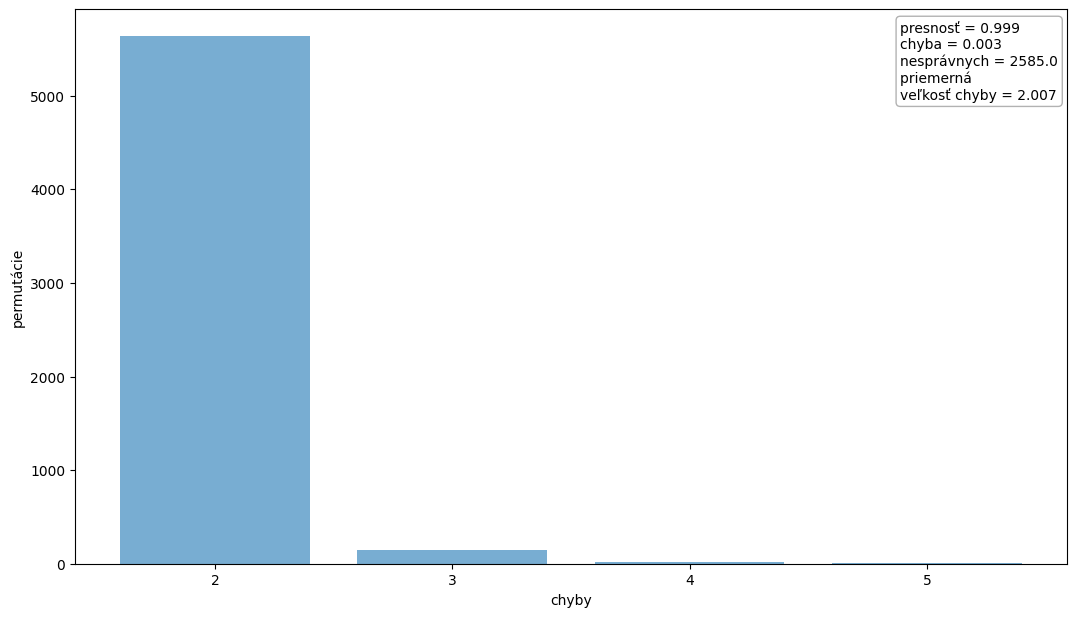

In [6]:
def mean_error(runs, path, data, max_final_tests):
    results_a = []
    all_a = []
    errors_a = []
    invalid_a = []
    valid_a = []
    accuracy_a = []
    error_a = []
    mean_error_a = []
    bars_counts = []

    for run in runs:
      results = test_max_n_cases(run.network, data, max_final_tests)
      all = len(results)
      errors = results[results != 0]
      invalid = len(errors)
      valid = len(results) - invalid
      accuracy = valid/all
      error = 1 - accuracy
      mean_error = np.mean(errors) if len(errors) > 0 else 0

      results_a.append(results)
      all_a.append(all)
      errors_a.append(errors)
      invalid_a.append(invalid)
      valid_a.append(valid)
      accuracy_a.append(accuracy)
      error_a.append(error)
      mean_error_a.append(mean_error)

    errors = np.concatenate(errors_a)
    bars, counts = np.unique(errors, return_counts=True)
    fig, ax = plt.subplots(figsize=(12.8, 7.2), dpi=100)
    plt.bar(bars, counts, alpha=0.6)
    plt.xticks(bars, bars)
    textstr = '\n'.join((
        f"presnosť = {round(np.mean(accuracy_a),3)}",
        f"chyba = {round(np.mean(error),3)}",
        f'nesprávnych = {np.mean(invalid)}',
        f"priemerná \nveľkosť chyby = {round(np.mean(mean_error), 3)}"))

    props = dict(boxstyle='round', facecolor='white', alpha=0.3)
    plt.text(0.832, 0.98, textstr, verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, bbox=props)
    plt.xlabel("chyby")
    plt.ylabel("permutácie")
    fig.savefig(os.path.join(path, "all_errors_c99_1000.png"))  
    fig.savefig(os.path.join(path, "all_errors_c99_1000.pdf"), format="pdf")  

print(g99_1000.shape)
mean_error(g99_1000, path, np.arange(1,16), 1e6)

!cp -R stats drive/MyDrive/VUT/EVO/errors

Best sorting network: [(4, 9, False), (2, 4, True), (0, 3, True), (2, 9, True), (0, 4, True), (1, 8, True), (5, 10, True), (1, 4, True), (6, 12, True), (0, 7, True), (7, 12, True), (1, 11, True), (7, 10, True), (2, 11, True), (1, 6, True), (1, 12, True), (3, 12, True), (1, 5, True), (2, 12, False), (1, 7, True), (3, 8, True), (11, 12, True), (2, 7, True), (1, 14, True), (0, 11, True), (0, 5, True), (5, 7, True), (0, 13, True), (3, 13, True), (5, 8, True), (2, 6, True), (4, 12, False), (5, 9, True), (0, 6, False), (4, 7, True), (3, 11, True), (1, 2, True), (0, 14, True), (5, 11, True), (0, 2, True), (4, 11, False), (3, 6, True), (8, 9, True), (3, 5, True), (3, 14, True), (3, 10, False), (4, 10, True), (5, 13, False), (3, 9, False), (0, 1, True), (1, 10, True), (9, 12, True), (2, 10, True), (4, 13, True), (4, 6, True), (2, 8, False), (6, 10, True), (2, 5, True), (8, 12, True), (2, 13, False), (3, 7, True), (5, 12, False), (1, 3, True), (0, 12, False), (8, 10, True), (2, 14, False), (4, 8

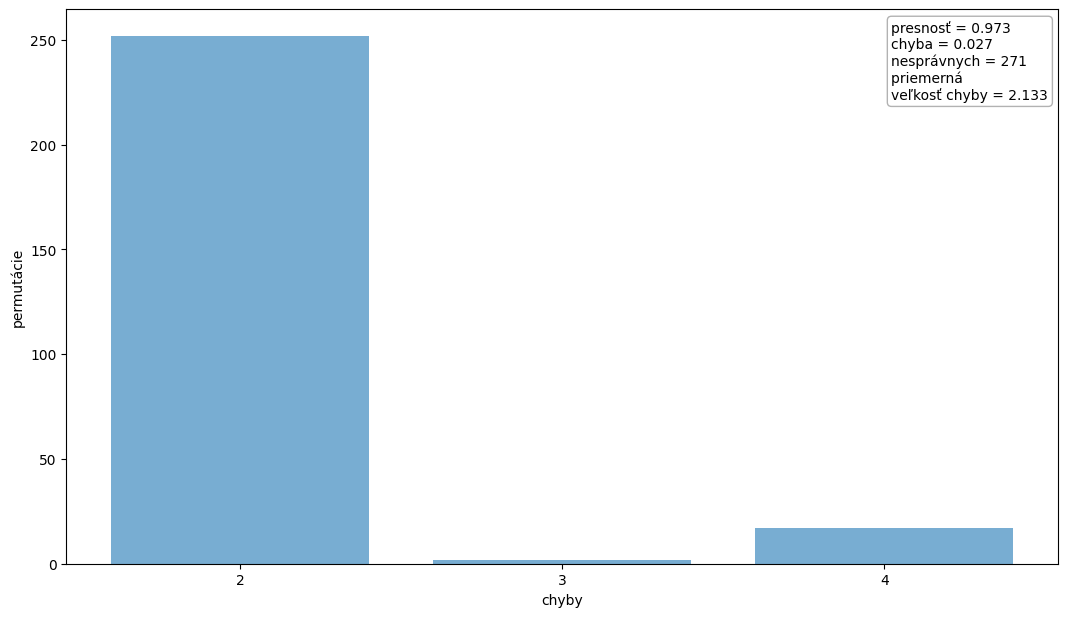

In [14]:
def best_error_fitness_history(runs, path, data, max_final_tests):
    best = min(runs, key=lambda x:x.fitness)
    print("Best sorting network:", best.network)
    print("Fitness:", best.fitness)
    print("Num of comparators:", num_of_comparators(best.network))

    results = test_max_n_cases(best.network, data, max_final_tests)
    all = len(results)
    errors = results[results != 0]
    invalid = len(errors)
    valid = len(results) - invalid
    accuracy = valid/all
    error = 1 - accuracy
    mean_error = np.mean(errors) if len(errors) > 0 else 0

    fig, ax = plt.subplots(figsize=(12.8, 7.2), dpi=100)
    bars, counts = np.unique(errors, return_counts=True)
    print(bars, counts)
    plt.bar(bars, counts, alpha=0.6)
    plt.xticks(bars, bars)
    textstr = '\n'.join((
        f"presnosť = {round(accuracy,3)}",
        f"chyba = {round(error,3)}",
        f'nesprávnych = {invalid}',
        f"priemerná \nveľkosť chyby = {round(mean_error, 3)}"))

    props = dict(boxstyle='round', facecolor='white', alpha=0.3)
    plt.text(0.832, 0.98, textstr, verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, bbox=props)
    plt.xlabel("chyby")
    plt.ylabel("permutácie")
    fig.savefig(os.path.join(path, "best_errors.png"))

best_error_fitness_history(c99, path, np.arange(1,16), 1e4)